In [1]:
import gspread
from prtpy.prtpy.partitioning.kk import kk
from prtpy.prtpy.bins import BinsKeepingContents

In [2]:
def target_func(series, k):
    '''

    :param series: the items we get from the datasheet
    :param k: numbet of bins we get from datasheet
    :return: the kk algorithm to return a optimal patitioning
    '''
    return kk(BinsKeepingContents(k), items=series).bins

In [4]:
 # connect to google account
account = gspread.service_account("credentials.json")


In [5]:
# read spreadsheet
spreadsheet = account.open('Q2')

In [6]:
# read Input sheet
input_sheet = spreadsheet.worksheet('Input')

In [7]:
# extract input sheet data
input_data = input_sheet.get_all_values()

In [8]:
series = [int(n) for n in input_data[0]]
k = int(input_data[1][0])

In [9]:
# apply target function
output_data = target_func(series, k)

In [10]:
try:
    output_sheet = spreadsheet.worksheet('Output')
    spreadsheet.del_worksheet(output_sheet)
except:
    pass
output_sheet = spreadsheet.add_worksheet("Output", input_sheet.row_count, input_sheet.col_count)

In [11]:
# insert output data to output sheet
output_sheet.append_rows(output_data)

{'spreadsheetId': '18YXF3EF46bXuDU69jWk88XKtAQj_vuHGcUeHJbOqzxA',
 'updates': {'spreadsheetId': '18YXF3EF46bXuDU69jWk88XKtAQj_vuHGcUeHJbOqzxA',
  'updatedRange': 'Output!A1:B3',
  'updatedRows': 3,
  'updatedColumns': 2,
  'updatedCells': 6}}

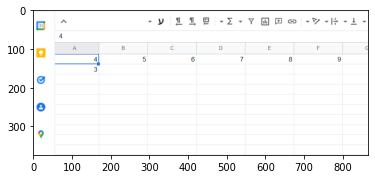

In [20]:
 
import matplotlib.pyplot as plt
 
# Let's show the input :
# First row represents the items , second the num of bins 
input_img = plt.imread('input.png')
plt.imshow(input_img)


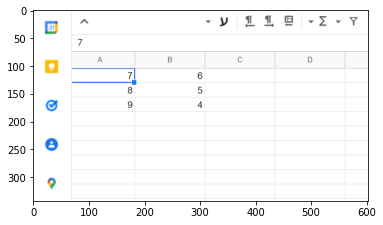

In [21]:
# Let's show the output 
# each row repesent a bin which is the optimal partition ([7,6],[8,5][9,4], d=0)
output_img = plt.imread('output.png')
plt.imshow(output_img)